# Taylor models of multivariate functions

(by Sean Cowan)

This notebook introduces the application of Taylor models to multivariate functions.

## Importing stuff

In [1]:
from pyaudi import gdual_double as gdual, taylor_model, int_d
from pyaudi import exp, log, sin, tan, sinh, tanh
import numpy as np
import scipy as sci
from itertools import product
import matplotlib.pyplot as plt
import matplotlib.colors as col
import seaborn as sns

from plotting_functions import plot_orders

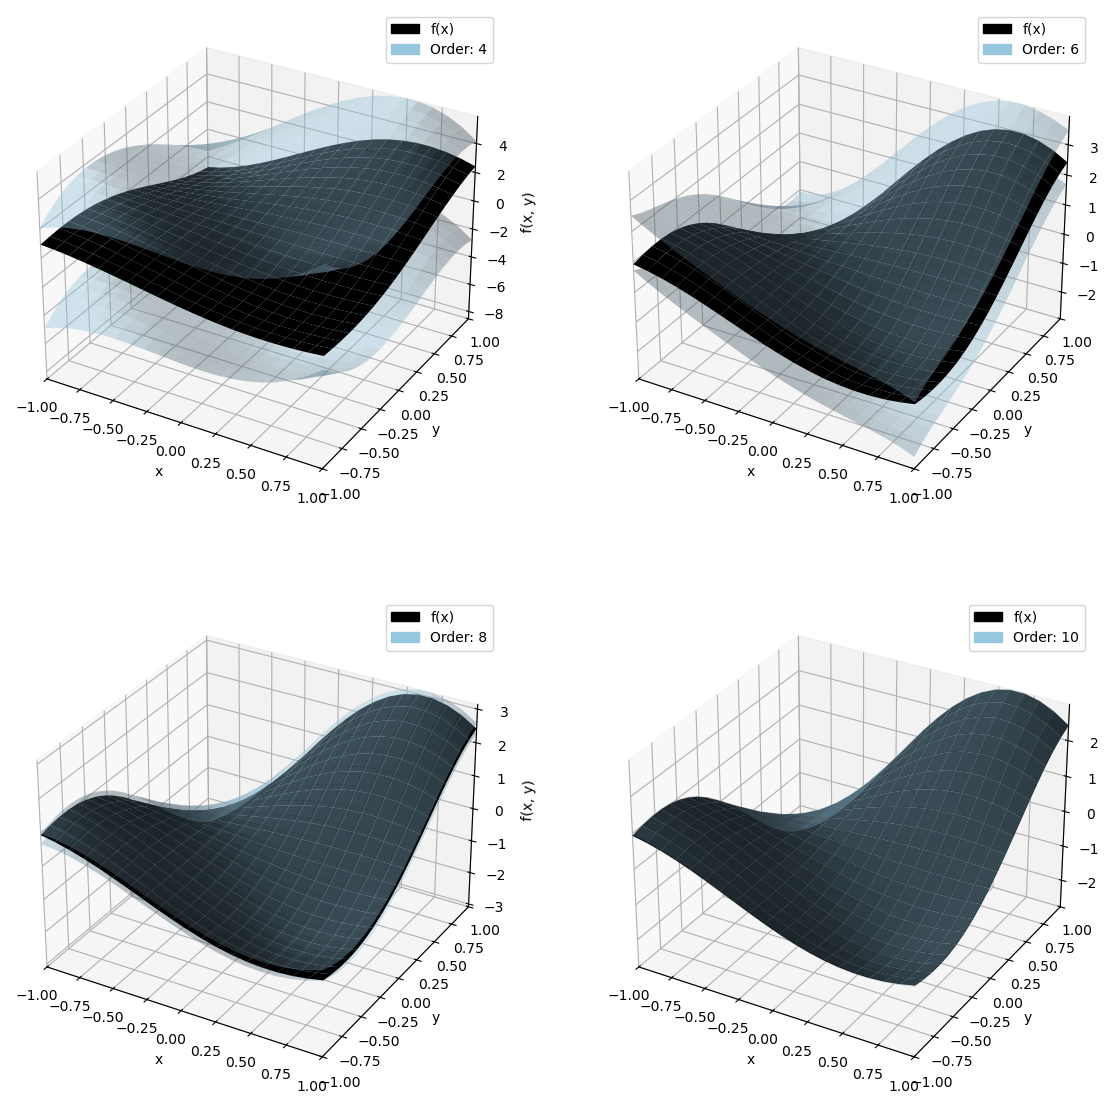

In [2]:
def func(x, y):
    if isinstance(x, taylor_model) and isinstance(y, taylor_model):
        return sin(1.7 * x + 0.5) * (y + 2) * sin(1.5 * y)
    else:
        return np.sin(1.7 * x + 0.5) * (y + 2) * np.sin(1.5 * y)

exp_point = {"x" : 0.0, "y" : 0.0}
rem_bound = int_d(0.0, 0.0)
domain = {"x" : int_d(-1.0, 1.0), "y": int_d(-1.0, 1.0)}

orders = [4, 6, 8, 10]
fig = plt.figure(figsize=(14, 14))
for it, order in enumerate(orders):
    ax = fig.add_subplot(2, 2, it+1, projection="3d")
    ax = plot_orders(func, rem_bound, exp_point, domain, ax=ax, orders=[order], buffer=0.0, plot_type="surface",
        n_of_points=20
    )
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('f(x, y)')

## 3-dimensional complex (real-valued) function

Next, a 3-dimensional complex (real-valued) function is used to verify the size of the remainder bounds as compared to Makino (1998). The function is defined over the domain $x \in [1.95, 2.05]$, $y \in [0.95, 1.05]$, and $z \in [0.95, 1.05]$ like so:

$$
\begin{aligned}
f\left(x, y, z\right)= & \frac{4 \tan \left(3 y\right)}{3 x+x \sqrt{\frac{6 x}{-7\left(x-8\right)}}}-120-2 x-7 z\left(1+2 y\right) \\
& -\sinh \left(0.5+\frac{6 y}{8 y+7}\right)+\frac{\left(3 y+13\right)^2}{3 z} \\
& -20 z\left(2 z-5\right)+\frac{5 x \tanh \left(0.9 z\right)}{\sqrt{5 y}}-20 y \sin \left(3 z\right)
\end{aligned}
$$

In [3]:
exp_point_x = {"x": 2}
exp_point_y = {"y": 1}
exp_point_z = {"z": 1}
rem_bound_2 = int_d(0.0, 0.0)
domain_x = {"x": int_d(1.95, 2.05)}
domain_y = {"y": int_d(0.95, 1.05)}
domain_z = {"z": int_d(0.95, 1.05)}
for order_2 in range(1, 16):
    x_2 = gdual(exp_point_x["x"], "x", order_2)  # Centered at 0.0, called "x1", to order 5
    y_2 = gdual(exp_point_y["y"], "y", order_2)  # Centered at 0.0, called "x1", to order 5
    z_2 = gdual(exp_point_z["z"], "z", order_2)  # Centered at 0.0, called "x1", to order 5
    T_x_2 = taylor_model(x_2, rem_bound_2, exp_point_x, domain_x)
    T_y_2 = taylor_model(y_2, rem_bound_2, exp_point_y, domain_y)
    T_z_2 = taylor_model(z_2, rem_bound_2, exp_point_z, domain_z)

    f_Txyz = (
        4 * tan(3 * T_y_2) / (3 * T_x_2 + T_x_2 * (6 * T_x_2 / (-7 * (T_x_2 - 8))) ** (1 / 2))
        - 120
        - 2 * T_x_2
        - 7 * T_z_2 * (1 + 2 * T_y_2)
        - sinh(1 / 2 + 6 * T_y_2 / (8 * T_y_2 + 7))
        + (3 * T_y_2 + 13) ** 2 / (3 * T_z_2)
        - 20 * T_z_2 * (2 * T_z_2 - 5)
        + 5 * T_x_2 * tanh(0.9 * T_z_2) / (5 * T_y_2) ** (1 / 2)
        - 20 * T_y_2 * sin(3 * T_z_2)
    )
    print(f" order: {order_2} <> rem_bound: [{f_Txyz.rem_bound.lower}, {f_Txyz.rem_bound.upper}]")

 order: 1 <> rem_bound: [-0.3918672470678396, 0.723254643986191]
 order: 2 <> rem_bound: [-0.03320747373590342, 0.03323533528271228]
 order: 3 <> rem_bound: [-0.0009505735681300395, 0.0015290480994582828]
 order: 4 <> rem_bound: [-7.238410809822388e-05, 7.27816266545895e-05]
 order: 5 <> rem_bound: [-1.732691008669774e-06, 3.520475828557056e-06]
 order: 6 <> rem_bound: [-2.1813866628322254e-07, 2.2283025700535187e-07]
 order: 7 <> rem_bound: [-8.287965135965055e-09, 9.970496987119283e-09]
 order: 8 <> rem_bound: [-1.1709787248672719e-09, 1.2253344730779916e-09]
 order: 9 <> rem_bound: [-7.890677594441478e-11, 4.802354684637308e-11]
 order: 10 <> rem_bound: [-9.606923894401326e-12, 1.0231037018103419e-11]
 order: 11 <> rem_bound: [-8.642772872594831e-13, 3.6084259033301003e-13]
 order: 12 <> rem_bound: [-9.536903171620239e-14, 1.0245762758287539e-13]
 order: 13 <> rem_bound: [-9.642226379517254e-15, 3.4455590488839457e-15]
 order: 14 <> rem_bound: [-1.0097872640153169e-15, 1.08981182019

### Makino (1998) results

First, the remainder bounds are given below for various orders:

As for the actual bounds of the function a stark difference is also observed:

Bounds of f(x, y, z)  with numerical grid search: [-2.31165715, 1.78168226]  
Bounds of f(x, y, z)  with Makino interval arithmetic: [-16.36393303, 16.09747985]

We find  
- at order 3: [-2.3128829308660057, 1.7804001180039262]  
- at order 9: [-2.3116573204977717, 1.7816821327941998]

In [4]:
exp_point_x = {"x": 2}
exp_point_y = {"y": 1}
exp_point_z = {"z": 1}
rem_bound_2 = int_d(0.0, 0.0)
domain_x = {"x": int_d(1.95, 2.05)}
domain_y = {"y": int_d(0.95, 1.05)}
domain_z = {"z": int_d(0.95, 1.05)}
order = 5

x_2 = gdual(exp_point_x["x"], "x", order)  # Centered at 0.0, called "x1", to order 5
y_2 = gdual(exp_point_y["y"], "y", order)  # Centered at 0.0, called "x1", to order 5
z_2 = gdual(exp_point_z["z"], "z", order)  # Centered at 0.0, called "x1", to order 5
T_x_2 = taylor_model(x_2, rem_bound_2, exp_point_x, domain_x)
T_y_2 = taylor_model(y_2, rem_bound_2, exp_point_y, domain_y)
T_z_2 = taylor_model(z_2, rem_bound_2, exp_point_z, domain_z)

f_Txyz = (
    4 * tan(3 * T_y_2) / (3 * T_x_2 + T_x_2 * (6 * T_x_2 / (-7 * (T_x_2 - 8))) ** (1 / 2))
    - 120
    - 2 * T_x_2
    - 7 * T_z_2 * (1 + 2 * T_y_2)
    - sinh(1 / 2 + 6 * T_y_2 / (8 * T_y_2 + 7))
    + (3 * T_y_2 + 13) ** 2 / (3 * T_z_2)
    - 20 * T_z_2 * (2 * T_z_2 - 5)
    + 5 * T_x_2 * tanh(0.9 * T_z_2) / (5 * T_y_2) ** (1 / 2)
    - 20 * T_y_2 * sin(3 * T_z_2)
)

bounds = f_Txyz.get_bounds()
print(f"[{bounds.lower}, {bounds.upper}]")

[-2.3116582766956646, 1.7816808458323379]
